# 

### Import Packages and Data

In [0]:
# import module(s) into namespace
import pandas as pd   #we almost always need pandas because we like data frames
from bs4 import BeautifulSoup
import requests
import csv
from __future__ import division
pd.set_option('display.max_colwidth', 150) 

In [64]:
!pip install tweepy
import tweepy
from tweepy import OAuthHandler


consumer_key =  'YjZ77yjePvArLtnp4WOBJm6fP'
consumer_secret = 'VIiA3zN1jntdab1QRDEYjCZ4gYAa8tU1mxi3LMqjqjmHMz7iVm'
access_token= '1032395859898626050-WBTdOzBydYK4odmPXy9Ngx5JVLMYTz'
access_secret= 'XnbpZvdNWxHShzdnlrDkyyuxcMJbPQraWFIIdt1IgfWxu'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 


api = tweepy.API(auth)

Below we define an empty dataframe that will hold the tweets. The tweets will be collected based on geospatial and text critera specifying that 5000 tweets containing '#Trump' will be collected in the circular-area whose radius is 500 KM around the center of 1321 Rockhurst Rd, Kansas City, MO 64110, USA.

In [65]:
#Define an empty dataframe to create a list of tweets that can be printed
results = []

#Define the variables to be used in the api search
latitude = 39.032660
longitude = -94.569980
max_range = 250
hashtag = '#Trump'

#Get the first 5000 items based on the search query
for tweet in tweepy.Cursor(api.search, q = hashtag, geocode = '%f,%f,%dkm' % (latitude, longitude, max_range) ).items(1500):
    results.append(tweet)

#Verify the number of list items is 5000
print('API Call Output Type: ', type(results))
print('Tweet Objects: ', len(results))

API Call Output Type:  <class 'list'>
Tweet Objects:  1070


### Choose Tweet Objects to mine
* Hashtags included in tweet objects will be important in this project when identifying topic of discussion.
* A total count of all of a user's tweets (including retweets and quote tweets) could be closely related to the number of a user's followers. In addition, users that have suspiciously small status counts might be omitted from the analysis due to misrepresentation of tweet population sample or because they are spam accounts.
* The verified tweet object is a boolean value that distinguishes people of interest, such as celebrities or politicians, from normal twitter users.
* Mentions on a tweet will help keep us informed of what people are sharing with others about political topics. An example that might allow us to predict outcomes of midterm elections in November is the sentiment towards tweets containing #Trump.
* The language on a majority of these tweets will likely be English (en), other languages have a higher chance of misrepresenting our sample data by including irrelevant tweet objects.
* I chose to include the text object from tweets that contain #Trump in order to find twitter users interested in politics associated under Donald Trump's administration. This object was also chosen because it will likely provide insightful text that can be used to determine the underlying sentiment of a user towards Trump. 
* The next two tweet objects that I chose to include in my data frame were the retweet and favorite counts for tweets including #Trump in their tags. Retweet and favorite counts can be useful when analyzing popularity of a tweet and will likely require different weights if a user is favoriting tweets more often than retweeting. 
* Including the created_at tweet object was done in order to allow the data frame to be sorted in chronological order upon anlysis. This might show trends in popularity or sentiment depending upon the Chiefs performance after a game. 
* A user's name and account description might also allow us to predict the tweet's sentiment, which is why I chose to mine user.name and user.description tweet objects. The description of the account might also allow us to predict a political party affiliation.

In [0]:
#Create a function to convert a given list of tweets into a Pandas DataFrame
#The DataFrame will consist of only chosen values below

def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['TweetHashtags'] = [tweet.entities.get('hashtags') for tweet in tweets]
    DataSet['UserStatusCount'] = [tweet.user.statuses_count for tweet in tweets]
    DataSet['UserVerified'] = [tweet.user.verified for tweet in tweets]
    #DataSet['TweetMentions'] = [tweet.entities.get('user_mentions') for tweet in tweets]
    DataSet['TweetLanguage'] = [tweet.lang for tweet in tweets]
    DataSet['TweetText'] = [tweet.text for tweet in tweets]
    DataSet['TweetRetweetCount'] = [tweet.retweet_count for tweet in tweets]
    DataSet['TweetFavoriteCount'] = [tweet.favorite_count for tweet in tweets]
    DataSet['TweetCreated'] = [tweet.created_at for tweet in tweets]
    #DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    #DataSet['UserFollowerCount'] = [tweet.user.followers_count for tweet in tweets]

    return DataSet

### Create and Populate DataFrame
Here we are going to use the predefined list of tweet objects that we chose to populate a dataframe, which is named 'tweet_frame.' The resulting dataframe's shape is 500 rows by 9 columns. Printing ten of the tweet's text object is very informative, already it is obvious that most of these tweet's are going to be a form of a retweet (RT). In addition, the user @ArrowheadPride (an account I am actually following) appears to be very popular.

In [67]:
#Pass the tweets list to create a DataFrame
tweet_frame = toDataFrame(results)
print('Dataframe Shape (Rows, Columns): ', tweet_frame.shape)

Dataframe Shape (Rows, Columns):  (1070, 9)


In [68]:
tweet_frame['TweetText'][0:10]

0    RT @Jesus_isPeace: Prof who tweeted about teaching “future dead #cops” &amp; assassinating #Trump &amp; #Pence is founder of group that harassed #C…
1    Prof who tweeted about teaching “future dead #cops” &amp; assassinating #Trump &amp; #Pence is founder of group that harass… https://t.co/tBFatD9nz1
2          RT @Jesus_isPeace: #Trump Admin Cancels #FDA Contract to Purchase Body Parts of #AbortedBabies for Tax-Funded Research....\n\n#AbortionMurder…
3                        #Trump Admin Cancels #FDA Contract to Purchase Body Parts of #AbortedBabies for Tax-Funded Research....… https://t.co/30Mx4ypKJZ
4            RT @Jesus_isPeace: #BrettKavanaugh Smear Motive Revealed: #Democratic Operative Admits Derailing #KavanaughHearing is Really About Saving #…
5            RT @Jesus_isPeace: #BrettKavanaugh Smear Motive Revealed: #Democratic Operative Admits Derailing #KavanaughHearing is Really About Saving #…
6            RT @Jesus_isPeace: #BrettKavanaugh Smear Motive Revealed: #Demo

Taking a look at the head of our tweet_frame is also very helpful, it gives a brief introduction to the various types of data that will potentially be used during analysis.  

In [69]:
tweet_frame.head()

,TweetHashtags,UserStatusCount,UserVerified,TweetLanguage,TweetText,TweetRetweetCount,TweetFavoriteCount,TweetCreated,userDesc
0,"[{'text': 'cops', 'indices': [64, 69]}, {'text': 'Trump', 'indices': [91, 97]}, {'text': 'Pence', 'indices': [104, 110]}]",89767,False,en,RT @Jesus_isPeace: Prof who tweeted about teaching “future dead #cops” &amp; assassinating #Trump &amp; #Pence is founder of group that harassed #C…,1,0,2018-09-27 04:19:37,#WalkAway\nMother should I #BUILDTHEWALL\nNO LISTS\n#PatsNation\nFight the good fight EVERY MOMENT\n#KAG #NEWRESISTANCE \nhttps://t.co/qBYA9m9HMb\...
1,"[{'text': 'cops', 'indices': [45, 50]}, {'text': 'Trump', 'indices': [72, 78]}, {'text': 'Pence', 'indices': [85, 91]}]",130503,False,en,Prof who tweeted about teaching “future dead #cops” &amp; assassinating #Trump &amp; #Pence is founder of group that harass… https://t.co/tBFatD9nz1,1,1,2018-09-27 04:18:40,"#PresTrump #NoSharia #AmericaFirst #USA #DTS #CloseBorders #LockHerUp #Bible #Constitution #NoAbortion #A1 #A2 #Israel Genesis12:3, Esther4:14 2 C..."
2,"[{'text': 'Trump', 'indices': [19, 25]}, {'text': 'FDA', 'indices': [40, 44]}, {'text': 'AbortedBabies', 'indices': [80, 94]}]",92603,False,en,RT @Jesus_isPeace: #Trump Admin Cancels #FDA Contract to Purchase Body Parts of #AbortedBabies for Tax-Funded Research....\n\n#AbortionMurder…,1,0,2018-09-27 04:08:56,"Socialism is a philosophy of failure, a creed of ignorance and a gospel of envy. The equal sharing of misery. Sir Winston Churchill #WakeUpAmer..."
3,"[{'text': 'Trump', 'indices': [0, 6]}, {'text': 'FDA', 'indices': [21, 25]}, {'text': 'AbortedBabies', 'indices': [61, 75]}]",130503,False,en,#Trump Admin Cancels #FDA Contract to Purchase Body Parts of #AbortedBabies for Tax-Funded Research....… https://t.co/30Mx4ypKJZ,1,0,2018-09-27 04:02:07,"#PresTrump #NoSharia #AmericaFirst #USA #DTS #CloseBorders #LockHerUp #Bible #Constitution #NoAbortion #A1 #A2 #Israel Genesis12:3, Esther4:14 2 C..."
4,"[{'text': 'BrettKavanaugh', 'indices': [19, 34]}, {'text': 'Democratic', 'indices': [58, 69]}, {'text': 'KavanaughHearing', 'indices': [97, 114]}]",36283,False,en,RT @Jesus_isPeace: #BrettKavanaugh Smear Motive Revealed: #Democratic Operative Admits Derailing #KavanaughHearing is Really About Saving #…,3,0,2018-09-27 03:53:23,"🇺🇸#POTUS45❤#MAGA🇺🇸👍💥A feisty Business Woman💥#TrumpSupporter❤🌟JOIN #WalkAway, 🌟#AmericaFirst🇺🇸 NOT illegals😡"


In [70]:
tweet_frame.tail()

,TweetHashtags,UserStatusCount,UserVerified,TweetLanguage,TweetText,TweetRetweetCount,TweetFavoriteCount,TweetCreated,userDesc
1065,"[{'text': 'Racism', 'indices': [48, 55]}, {'text': 'Trump', 'indices': [76, 82]}, {'text': 'TrumpHaters', 'indices': [111, 123]}]",2100,False,en,"RT @wattsjim: So, what else is new? 99.9999% of #Racism charges about POTUS #Trump are LIES cooked up by Dems, #TrumpHaters &amp; #FakeNewsMedi…",350,0,2018-09-17 04:33:47,
1066,"[{'text': 'TRUMP', 'indices': [18, 24]}, {'text': 'MISSOURI', 'indices': [31, 40]}, {'text': 'SpringfieldMO', 'indices': [84, 98]}]",9367,False,en,"RT @Str8DonLemon: #TRUMP RALLY #MISSOURI!\n\nWhen? \nFri, September 21, 2018\n\nWhere? \n\n#SpringfieldMO\nJQH Arena\n685 S. John Q. Hammons Parkway…",179,0,2018-09-17 04:32:43,"Follower of Christ, President Trump/ VP Pence #TRUMP #MAGA #KAG #KAG2020\n#CONSERVATIVE"
1067,"[{'text': 'TRUMP', 'indices': [18, 24]}, {'text': 'MISSOURI', 'indices': [31, 40]}, {'text': 'SpringfieldMO', 'indices': [84, 98]}]",84869,False,en,"RT @Str8DonLemon: #TRUMP RALLY #MISSOURI!\n\nWhen? \nFri, September 21, 2018\n\nWhere? \n\n#SpringfieldMO\nJQH Arena\n685 S. John Q. Hammons Parkway…",179,0,2018-09-17 04:30:17,Married to a Combat Vet Trump is my @POTUS #BuildTheWall Followed By Anthoney Scaramucci Blocked by Cher & Nancy Sinatra #MAGA #TrumpTrain #Walk...
1068,"[{'text': 'TRUMP', 'indices': [18, 24]}, {'text': 'MISSOURI', 'indices': [31, 40]}, {'text': 'SpringfieldMO', 'indices': [84, 98]}]",28944,False,en,"RT @Str8DonLemon: #TRUMP RALLY #MISSOURI!\n\nWhen? \nFri, September 21, 2018\n\nWhere? \n\n#SpringfieldMO\nJQH Arena\n685 S. John Q. Hammons Parkway…",179,0,2018-09-17 04:29:57,🇺🇸Grassroots Twitter Team for #Christian #Conservative Principles & Candidates 🇺🇸Followed By Hannity #KAG #CruzCrew #ProLife #StopCommonCore #Vote...
1069,"[{'text': 'Racism', 'indices': [48, 55]}, {'text': 'Trump', 'indices': [76, 82]}, {'text': 'TrumpHaters', 'indices': [111, 123]}]",23801,False,en,"RT @wattsjim: So, what else is new? 99.9999% of #Racism charges about POTUS #Trump are LIES cooked up by Dems, #TrumpHaters &amp; #FakeNewsMedi…",350,0,2018-09-17 04:26:24,"US Marine Vet,Fire Fighter/Paramedic, father,husband and just a little bit off my rocker! #MAGA, I SUPPORT DJT"


### Count Vectorizer

In [0]:
#Import pandas into the workspace
import pandas as pd
#Import numpy into the workspace
import numpy as np
#Import the CountVectorizer module
from sklearn.feature_extraction.text import CountVectorizer
#Import the math function to do math
import math
#Specify the max width of pixels per column for text that will be analyzed
pd.set_option('display.max_colwidth', 800)

#### Count Vectorizer Summary
cv1
*   Parameters: stop_words='english'
*   Feature Space: 1113

cv2
*   Parameters: stop_words='stopwords'
*   Feature Space: 1106

cv3:
*   Parameters: stop_words=stopwords, min_df=.02, ngram_range = (2,3)
*   Feature Space: 122

cv4
*   Parameters: stop_words='stopwords', min_df=0.01
*   Feature Space: 232

#### CV 1

Initial count vectorizer will be built to identify commonly occurring one-word terms. Filtering the 'english' stopwords will be the only parameter added.

In [72]:
#Define the count vectorizer using default parameters
cv1 = CountVectorizer(stop_words='english')
#Apply the count vectorizer for the bag of words to the dataframe feature
cv1_text = cv1.fit_transform(tweet_frame['TweetText'])
#This is the feature space for TweetText
print('Shape:', cv1_text.shape)
#This is the type of matrix that is returned for TweetText
print('Type:', type(cv1_text))

Shape: (1070, 2708)
Type: <class 'scipy.sparse.csr.csr_matrix'>


In [73]:
#Print the sparse matrix as a data frame for an aestheticallly pleasing view of the feature space head#Print t 
pd.DataFrame(cv1_text.toarray(), columns = cv1.get_feature_names()).head(10)

,000,000k,08hqx3itby,08yydqgln5,0aeblsd7ys,0ct5cmy7sh,0iyi6oaxlj,0ulbyi8kiz,10,100,...,zfx5ycskvu,zghzckgrnx,zi28xp65g3,zi7wukfmjw,zjqvebebyo,zljoqykjia,zone,zub6dfgepn,zvwsgmwr5m,zxobcsvfux
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Most frequently occuring terms:

In [74]:
names = cv1.get_feature_names()   #create list of feature names

count = np.sum(cv1_text.toarray(), axis = 0) # convert list to array to add up feature counts 
count2 = count.tolist()  # convert numpy array to list

count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list

sorted_count = count_df.sort_values(['count'], ascending = False)
sorted_count.head(15)

,count
trump,727
rt,574
https,524
str8donlemon,176
amp,175
maga,133
president,119
realdonaldtrump,114
peacemomma67,107
missouri,92


Several terms were tokenized that do not appear to add any insights into the tweets. A custom list of terms will be added to the standard 'english' stopwords list. Another count vectorizer will be built using this list.

In [0]:
from sklearn.feature_extraction import text

mylist = ['rt', '&', 'amp','pff','http','md','way','fi','fbs','https','years','uh2bpyg3gu','just'] # Add more stopwords to standard english list
stopwords = text.ENGLISH_STOP_WORDS.union(mylist)

#### CV 2
Initial count vectorizer will be built to identify commonly occurring one-word terms. The stop_words are defined by an english and custom dictionary parameter called stopwords. Last, the head 15 in the resulting data set will be printed.

In [76]:
#Define the count vectorizer using default parameters
cv2 = CountVectorizer(stop_words=stopwords, min_df = .02)
#Apply the count vectorizer for the bag of words to the dataframe feature
cv2_text = cv2.fit_transform(tweet_frame['TweetText'])
#This is the feature space for TweetText
print('Shape:', cv2_text.shape)
#This is the type of matrix that is returned for TweetText
print('Type:', type(cv2_text))

Shape: (1070, 98)
Type: <class 'scipy.sparse.csr.csr_matrix'>


In [77]:
names = cv2.get_feature_names()   #create list of feature names

count = np.sum(cv2_text.toarray(), axis = 0) # convert list to array to add up feature counts 
count2 = count.tolist()  # convert numpy array to list

count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list

sorted_count = count_df.sort_values(['count'], ascending = False)
sorted_count.head(15)

,count
trump,727
str8donlemon,176
maga,133
president,119
realdonaldtrump,114
peacemomma67,107
missouri,92
mad,88
politics,85
asked,80


## Sentiment Analysis

Sentiment analysis will be performed to gain insight into the the tone of Tweets regarding Trump. The results will be used to generate a target variable for predictive modeling.

In [78]:
#Use google.colab to import dictionaries
from google.colab import files

#Choose file(s) to upload
uploaded = files.upload()


Saving AFINN-111.txt to AFINN-111 (1).txt
Saving inquirerbasic.csv to inquirerbasic (1).csv


In [79]:
#Run foreloop to execute the file upload
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "AFINN-111.txt" with length 28093 bytes
User uploaded file "inquirerbasic.csv" with length 2903900 bytes


In [80]:
# Sentiment dictionary that assigns scores to words signifying their sentiment polarity or neutrality

afinn = {}
for line in open("AFINN-111.txt"):
    tt = line.split('\t')
    afinn.update({tt[0]:int(tt[1])})


print(type(afinn), len(afinn))

for key, value in sorted(afinn.items())[0:10]:
    print(key + " => " + str(value))
print("~~~~~~~~~~~~")
for key, value in sorted(afinn.items())[2467:]:
    print(key + " => " + str(value))

<class 'dict'> 2477
abandon => -2
abandoned => -2
abandons => -2
abducted => -2
abduction => -2
abductions => -2
abhor => -3
abhorred => -3
abhorrent => -3
abhors => -3
~~~~~~~~~~~~
yeah => 1
yearning => 1
yeees => 2
yes => 1
youthful => 2
yucky => -2
yummy => 3
zealot => -2
zealots => -2
zealous => 2


In [0]:
# here we are going for strictly the sum:  add up the positives and "subtract" the negatives
# you can return a number or a label

def afinn_sent(inputstring):
    
    sentcount =0
    for word in inputstring.split():  
        if word.rstrip('?:!.,;') in afinn:
            sentcount = sentcount + afinn[word.rstrip('?:!.,;')]
            
    
    if (sentcount < 0):
        sentiment = 'Negative'
    elif (sentcount >0):
        sentiment = 'Positive'
    else:
        sentiment = 'Neutral'
    
    return sentiment
    #return sentcount

# T1 - Create Target Variable

In [1]:
tweet_frame['afinn'] = tweet_frame["TweetText"].apply(lambda x: afinn_sent(x))
print(type(tweet_frame['TweetText']))

NameError: ignored

In [83]:
tweet_frame.iloc[0:9][['TweetText','afinn']]

,TweetText,afinn
0,RT @Jesus_isPeace: Prof who tweeted about teaching “future dead #cops” &amp; assassinating #Trump &amp; #Pence is founder of group that harassed #C…,Negative
1,Prof who tweeted about teaching “future dead #cops” &amp; assassinating #Trump &amp; #Pence is founder of group that harass… https://t.co/tBFatD9nz1,Negative
2,RT @Jesus_isPeace: #Trump Admin Cancels #FDA Contract to Purchase Body Parts of #AbortedBabies for Tax-Funded Research....\n\n#AbortionMurder…,Neutral
3,#Trump Admin Cancels #FDA Contract to Purchase Body Parts of #AbortedBabies for Tax-Funded Research....… https://t.co/30Mx4ypKJZ,Neutral
4,RT @Jesus_isPeace: #BrettKavanaugh Smear Motive Revealed: #Democratic Operative Admits Derailing #KavanaughHearing is Really About Saving #…,Neutral
5,RT @Jesus_isPeace: #BrettKavanaugh Smear Motive Revealed: #Democratic Operative Admits Derailing #KavanaughHearing is Really About Saving #…,Neutral
6,RT @Jesus_isPeace: #BrettKavanaugh Smear Motive Revealed: #Democratic Operative Admits Derailing #KavanaughHearing is Really About Saving #…,Neutral
7,#BrettKavanaugh Smear Motive Revealed: #Democratic Operative Admits Derailing #KavanaughHearing is Really About Sav… https://t.co/76aT5sf83g,Neutral
8,In response from Trump #TrumpPressConference #Trump https://t.co/xRDP398kv7,Neutral


In [84]:
tweet_frame.iloc[490:501][['TweetText','afinn']]

,TweetText,afinn
490,"Excited to see President Trump today! To all those that are going to protest, you will make no impact on anything a… https://t.co/QmEaAWBuxm",Negative
491,"I mean, I'm not a huge #trump or #Kavanaugh guy, but is he being asked to defend himself against unknown allegation… https://t.co/Lvv4wwhWBk",Positive
492,RT @TeamDean: Will President #Trump’s nudge tonight finally force @RosenforNevada to answer @DeanHeller’s challenge? https://t.co/CXmmnzm1Y…,Negative
493,RT @TeamDean: Will President #Trump’s nudge tonight finally force @RosenforNevada to answer @DeanHeller’s challenge? https://t.co/CXmmnzm1Y…,Negative
494,RT @TeamDean: Will President #Trump’s nudge tonight finally force @RosenforNevada to answer @DeanHeller’s challenge? https://t.co/CXmmnzm1Y…,Negative
495,RT @TeamDean: Will President #Trump’s nudge tonight finally force @RosenforNevada to answer @DeanHeller’s challenge? https://t.co/CXmmnzm1Y…,Negative
496,RT @TeamDean: Will President #Trump’s nudge tonight finally force @RosenforNevada to answer @DeanHeller’s challenge? https://t.co/CXmmnzm1Y…,Negative
497,@CChristineFair Wow you got Trump Derangement Syndrome real bad.....oh we are not snowflakes...that would be you sc… https://t.co/nyN9DfBhBW,Neutral
498,"Dear #ClaireMcCaskill ,\n\n Your offical Dear John letter. We never thought about you much, you were just there.… https://t.co/OyDEMZcp2x",Neutral
499,"RT @ForOurFutureNV: Working Nevadans are out on the streets, standing up to the #Trump agenda. We're going forward, not backward. #StopKava…",Neutral


Viewing some of the Tweets and their sentiment labels as ascribed by the afinn dictionary, it is unclear how to interpret the labels' accuracies. It is no surprise that the conversation around Trump is contentious, with many Tweets attacking the president and others defending him. This poses some difficulty in the senitment labeling of some Tweets. Strong language of those "loving to hate" Trump praise condemning articles or Tweets against the president, with those being labeled as positive. Similarly, those who defend Trump by condemning attacks against the president are labeled as negative. The sentiment labels may more accurately describe the general tone of conversation around Trump rather than people's direct attitudes towards him.

# Predictive Modeling

### What is the distribution of the target variable?

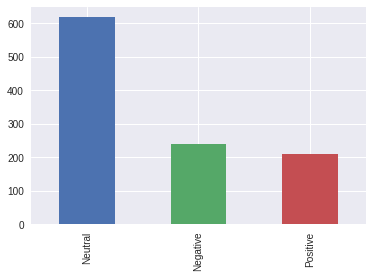

In [85]:
# What does our target variable look like?
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
tweet_frame['afinn'].value_counts().plot(kind='bar')

### Split dataset into train and test

In [86]:
# train test split
# data are X, labels are y
from sklearn.model_selection import train_test_split

X = cv2_text.toarray()  #remember this is the output from the vectorizer and we are turning it into an array
print(type(X))


y = tweet_frame['afinn'].values #this is an array of labels
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #random_state is set seed

# function creates 4 output structures - order matters
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(749, 98)
(321, 98)
(749,)
(321,)


# T1 - Baseline Models

## Decision Tree

In [88]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a Decision Tree model to the data
model = DecisionTreeClassifier(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
clf1_expected = y_test
clf1_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf1_expected, clf1_predicted)))
print(metrics.classification_report(clf1_expected, clf1_predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
0.7289719626168224
accuracy: 0.7289719626168224
             precision    recall  f1-score   support

   Negative       0.77      0.51      0.62        72
    Neutral       0.73      0.89      0.80       190
   Positive       0.67      0.47      0.55        59

avg / total       0.73      0.73      0.72       321



The decision tree performed very well with a .873 overall accuracy and a .87 average f1 score. The recall for the positive class was significantly lower than the neutral or negative classes, which is unsurprising due to its minority status in the dataset. 

#### Confusion Matrix

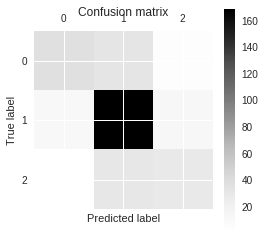

[[ 37  32   3]
 [ 10 169  11]
 [  1  30  28]]


In [89]:
# display confusion matrix
def create_cm(t1, t2):
    cm = metrics.confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(cm)

create_cm(clf1_expected, clf1_predicted)

## Naïve Bayes

In [90]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive Bayes model to the data
model = MultinomialNB()
print(model)
model.fit(X_train, y_train)

# make predictions
clf2_expected = y_test
clf2_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf2_expected, clf2_predicted)))
print(metrics.classification_report(clf2_expected, clf2_predicted))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.6697819314641744
accuracy: 0.6697819314641744
             precision    recall  f1-score   support

   Negative       0.74      0.40      0.52        72
    Neutral       0.70      0.86      0.77       190
   Positive       0.46      0.37      0.41        59

avg / total       0.67      0.67      0.65       321



The Naive Bayes model performed significantly worse than the decision tree. Overall accuracy was only .72 and the neutral recall decreased to .63. The positive class recall increased to .71, though precision decreased to .25. This means that the model classified many more observations as belonging to the positive class which led to more true positive claassifications, but also a large amount of neutral observations being misclassified as positive. 

#### Confusion Matrix

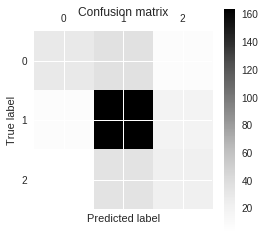

[[ 29  36   7]
 [  7 164  19]
 [  3  34  22]]


In [91]:
create_cm(clf2_expected, clf2_predicted)

## Logistic Regression

In [92]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
clf3_expected = y_test
clf3_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf3_expected, clf3_predicted)))
print(metrics.classification_report(clf3_expected, clf3_predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.7570093457943925
accuracy: 0.7570093457943925
             precision    recall  f1-score   support

   Negative       0.97      0.40      0.57        72
    Neutral       0.72      0.97      0.83       190
   Positive       0.83      0.49      0.62        59

avg / total       0.80      0.76      0.73       321



The logistic regression model preformed mich better than Naive Bayes, but slightly worse than the decision tree in overall accuracy. The primary shortcoming of this model is that the positive class recall was only .56, meaning that just over half of the positive class instances were identified.

#### Confusion Matrix

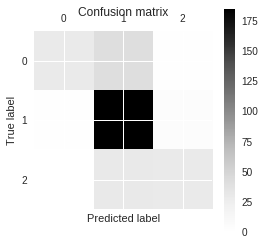

[[ 29  41   2]
 [  1 185   4]
 [  0  30  29]]


In [93]:
create_cm(clf3_expected, clf3_predicted)

## K-Nearest Neighbors

This model usess the scikit-learn library algotithm defined with function and parameters: 
** class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, kwargs)[source] **

Arguments:
* n_neighbors - number of neighbors to check
* weights - weight function used in prediction. 
* Possible values:
    * ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
    * ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
    * These are NOT the same as TfIdf weights
* metric : distance metric with the default setting = ‘minkowski’. "Minkowski distance is a metric in a normed vector space which can be considered as a generalization of both the Euclidean distance and the Manhattan distance." (Wikipedia)
* p: power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. 

Default settings are k=5, weights = uniform, minkowski distance with p = 2 => Euclidean distance

The following code block imports this predictive model with a defined training and testing dataset. The output indicates the classification model's accuracy, precision, recall, f1-score, and support.

In [94]:
#Load KNN predictive model library
from sklearn.neighbors import KNeighborsClassifier
#Define predictive model with default parameters of n_neighbors = 3
KNN = KNeighborsClassifier()
#Fit training and testing datasets to model
KNN.fit(X_train, y_train)
#Test the model by comparing predictions to the test actuals
KNN_expected = y_test
KNN_predicted = KNN.predict(X_test)
#Show measures of prediction
print("accuracy: " + str(metrics.accuracy_score(KNN_expected, KNN_predicted)))
print(metrics.classification_report(KNN_expected, KNN_predicted))

accuracy: 0.7289719626168224
             precision    recall  f1-score   support

   Negative       0.79      0.42      0.55        72
    Neutral       0.71      0.95      0.81       190
   Positive       0.77      0.41      0.53        59

avg / total       0.74      0.73      0.70       321



#### Confusion Matrix

The K-Nearest Neighbors model with default parameters creates a confusion matrix containing the values of true and false lables, representing the predictive accuracy.

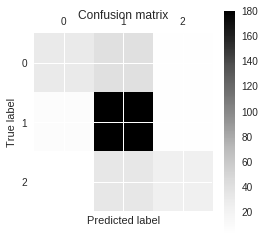

[[ 30  39   3]
 [  6 180   4]
 [  2  33  24]]


In [95]:
#Create a basic confusion matrix in an array
create_cm(KNN_expected, KNN_predicted)
#Define function to print confusion matrix
def create_cm(t1, t2):
    cm = metrics.confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(cm)

# T2 - Improve Performance with Hyperparameter Tuning

## Decision Tree with Tuning

This decision tree will include balanced class weights, which should help the model identify more positive (minority) class instances. The max_features parameter will also be set to 50, limiting the numebr of features to be considered at each split.

In [96]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a Decision Tree model to the data
model = DecisionTreeClassifier(class_weight = 'balanced', max_features = 50, random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
clf4_expected = y_test
clf4_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf4_expected, clf4_predicted)))
print(metrics.classification_report(clf4_expected, clf4_predicted))

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
0.6635514018691588
accuracy: 0.6635514018691588
             precision    recall  f1-score   support

   Negative       0.46      0.79      0.58        72
    Neutral       0.86      0.62      0.72       190
   Positive       0.63      0.64      0.64        59

avg / total       0.73      0.66      0.68       321



The overall accuracy went down from .87 with no tuning to .8 with tuning. This decrease in overall accuracy may be acceptable due to the high increase in recall in the positive class. 88 percent of positive class instances were identified, albeit with only .34 precision. The balanced class weights essentially cast a wider net to identify more positive class instances, which resulted in a misclassification of neutral and negative instances as positive. If the concern is to identify Tweets that are more polar in their sentiment, then this model is more desireable. However, if simple accuracy is the goal, then the baseline model is preferable.

The misclassifications of neutral and negative instances as positive can be clearly seen in the confusion matrix below (with 2 referring to the positive class)

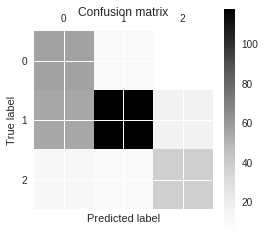

[[ 57  10   5]
 [ 55 118  17]
 [ 12   9  38]]


In [97]:
create_cm(clf4_expected, clf4_predicted)

## Naïve Bayes with Tuning

In [98]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive Bayes model to the data
model = MultinomialNB(alpha = 4)
print(model)
model.fit(X_train, y_train)

# make predictions
clf5_expected = y_test
clf5_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf5_expected, clf5_predicted)))
print(metrics.classification_report(clf5_expected, clf5_predicted))

MultinomialNB(alpha=4, class_prior=None, fit_prior=True)
0.6542056074766355
accuracy: 0.6542056074766355
             precision    recall  f1-score   support

   Negative       0.72      0.36      0.48        72
    Neutral       0.68      0.87      0.77       190
   Positive       0.43      0.31      0.36        59

avg / total       0.65      0.65      0.63       321



Increasing the alpha value incrased overall accuracy by about .02. The positive class recall increased, although at the expense of precision. This model still significantly inderperformed the decision tree model. 

#### Confusion Matrix

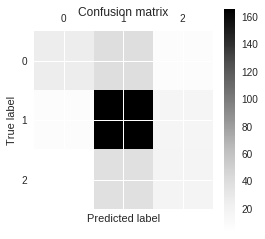

[[ 26  39   7]
 [  7 166  17]
 [  3  38  18]]


In [99]:
create_cm(clf5_expected, clf5_predicted)

## Logistic Regression with Tuning

In [100]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
model = LogisticRegression(C = 3, class_weight="balanced", random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
clf6_expected = y_test
clf6_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf6_expected, clf6_predicted)))
print(metrics.classification_report(clf6_expected, clf6_predicted))

LogisticRegression(C=3, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.7071651090342679
accuracy: 0.7071651090342679
             precision    recall  f1-score   support

   Negative       0.69      0.47      0.56        72
    Neutral       0.75      0.83      0.79       190
   Positive       0.56      0.59      0.58        59

avg / total       0.70      0.71      0.70       321



Increasing the cost value (C) and adding balanced calss weights had a similar effect as the tunings employed on the decision tree. The positive class recall significantly increased at the expense of neutral class recall. The increase in positive class recall was not quite as high as that of the decision tree, but precision was quite higher at .46. Again, if the concern is to identify Tweets that have more polarity in sentiment, this tuned logit model is preferable. But if overall accuracy is the objective, the baseline model is better. 

## K-Nearest Neighbors with Tuning

Tuning the K-Nearest Neighbors predictive model will be done using the "elbow method." This method will be used to find the optimal parameter for the n_neighbors parameter, by determining the steepest slope with the smallest misclassification error (MSE). The next step is to define and test the model on the predefined training and testing data set, resulting in the summary statistics of the fit and a confusion matrix.

In [0]:
#Import the package from scikit-learn library
from sklearn.model_selection import cross_val_score
#Creating odd list of K for KNN
myList = list(range(1,35))
#Subset only odd K values
neighbors = list(filter(lambda x: x % 2 != 0, myList))
#Define an empty list to store cross validation scores
cv_scores = []
#Create a foreloop forn 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 5


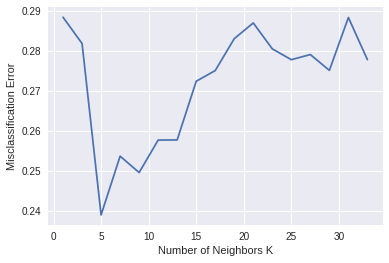

In [102]:
#Define the MSE
MSE = [1 - x for x in cv_scores]
#Determine optimal K value
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)
#Plot the elbow graph of K and MSE
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [120]:
#Instantiate predictive model 
KNN23 = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
#Test the model
KNN23_expected = y_test
KNN23_predicted = model.predict(X_test)
#Summary statistics of the model fit
print("accuracy: " + str(metrics.accuracy_score(KNN23_expected, KNN23_predicted)))
print(metrics.classification_report(KNN23_expected, KNN23_predicted))

0.6635514018691588
accuracy: 0.6635514018691588
             precision    recall  f1-score   support

   Negative       0.77      0.28      0.41        72
    Neutral       0.65      0.96      0.78       190
   Positive       0.77      0.17      0.28        59

avg / total       0.70      0.66      0.60       321



#### Confusion Matrix

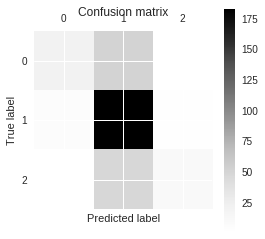

[[ 20  51   1]
 [  5 183   2]
 [  1  48  10]]


In [121]:
#Create a basic confusion matrix in an array
create_cm(KNN23_expected, KNN23_predicted)
#Define function to print confusion matrix
def create_cm(t1, t2):
    cm = metrics.confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(cm)

## CV 3

Now that some tuned models have been run using the text from CV3, a new count vectorizer will be built with an increased ngram_rang to see how giving a little more context (i.e. 2 and 3 word combinations) will aid the models in their predicitons.

In [105]:
#Define the count vectorizer using default parameters
cv3 = CountVectorizer(stop_words=stopwords, min_df = .02, ngram_range = (2,3))
#Apply the count vectorizer for the bag of words to the dataframe feature
cv3_text = cv3.fit_transform(tweet_frame['TweetText'])
#This is the feature space for TweetText
print('Shape:', cv3_text.shape)
#This is the type of matrix that is returned for TweetText
print('Type:', type(cv3_text))

Shape: (1070, 157)
Type: <class 'scipy.sparse.csr.csr_matrix'>


In [106]:
names = cv3.get_feature_names()   #create list of feature names

count = np.sum(cv3_text.toarray(), axis = 0) # convert list to array to add up feature counts 
count2 = count.tolist()  # convert numpy array to list

count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list

sorted_count = count_df.sort_values(['count'], ascending = False)
sorted_count.head(15)

,count
boy asked,76
aid distribution center,76
president realdonaldtrump,76
center boy asked,76
center boy,76
boy asked president,76
distribution center,76
asked president realdonaldtrump,76
asked president,76
realdonaldtrump hug,76


The top occurring two and three word combinations give some insight into the heated anture of the world of #Trump Tweets. This text will now be used for classification.

### Split into train/test

In [107]:
# train test split
# data are X, labels are y
from sklearn.model_selection import train_test_split

X = cv3_text.toarray()  #remember this is the output from the vectorizer and we are turning it into an array
print(type(X))


y = tweet_frame['afinn'].values #this is an array of labels
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #random_state is set seed

# function creates 4 output structures - order matters
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(749, 157)
(321, 157)
(749,)
(321,)


## Decision Tree- baseline 2

In [109]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a Decision Tree model to the data
model = DecisionTreeClassifier(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
clf7_expected = y_test
clf7_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf7_expected, clf7_predicted)))
print(metrics.classification_report(clf7_expected, clf7_predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
0.67601246105919
accuracy: 0.67601246105919
             precision    recall  f1-score   support

   Negative       1.00      0.26      0.42        72
    Neutral       0.65      0.99      0.78       190
   Positive       0.77      0.17      0.28        59

avg / total       0.75      0.68      0.61       321



This decision tree produced very different results than the initial one with the cv2_text. Neutral class recall was 1.00, meaning all neutral instances were identified, albeit with only .75 precision. The positive class recall was only .05, but had perfect precision. Despite the relatively high overall accuracy (.818), this model is not very helpful as it barely classifies any instances in the positive class. 

## Decision Tree tuned 2

In [110]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a Decision Tree model to the data
model = DecisionTreeClassifier(class_weight='balanced',max_features=50,random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
clf8_expected = y_test
clf8_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf8_expected, clf8_predicted)))
print(metrics.classification_report(clf8_expected, clf8_predicted))

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
0.40809968847352024
accuracy: 0.40809968847352024
             precision    recall  f1-score   support

   Negative       0.76      0.26      0.39        72
    Neutral       0.92      0.29      0.45       190
   Positive       0.24      0.95      0.38        59

avg / total       0.76      0.41      0.42       321



Adding the tuning parameters of balanced calss weights and max features greatly altered the results. The overall accuracy went down significantly to .655, though the positive class recall increased greatly, albeit with very poor precision. This was at the expense of the neutral class recall, which lowered to .52. 

## Naïve Bayes baseline 2

In [111]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive Bayes model to the data
model = MultinomialNB()
print(model)
model.fit(X_train, y_train)

# make predictions
clf9_expected = y_test
clf9_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf9_expected, clf9_predicted)))
print(metrics.classification_report(clf9_expected, clf9_predicted))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.6791277258566978
accuracy: 0.6791277258566978
             precision    recall  f1-score   support

   Negative       0.88      0.29      0.44        72
    Neutral       0.65      0.98      0.78       190
   Positive       1.00      0.17      0.29        59

avg / total       0.77      0.68      0.62       321



This model performed very poorly. Let's see if increasing the alpha parameter cahnges anything.

## Naive Bayes tuned 2

In [112]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive Bayes model to the data
model = MultinomialNB(alpha=2)
print(model)
model.fit(X_train, y_train)

# make predictions
clf10_expected = y_test
clf10_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf10_expected, clf10_predicted)))
print(metrics.classification_report(clf10_expected, clf10_predicted))

MultinomialNB(alpha=2, class_prior=None, fit_prior=True)
0.6791277258566978
accuracy: 0.6791277258566978
             precision    recall  f1-score   support

   Negative       0.88      0.29      0.44        72
    Neutral       0.65      0.98      0.78       190
   Positive       1.00      0.17      0.29        59

avg / total       0.77      0.68      0.62       321



Increasing the alpha value did not do much to improve this model. The positive class metrics particularly make this model useless compared to others that have been constructed.

## Logistic Regression baseline 2

In [113]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
clf11_expected = y_test
clf11_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf11_expected, clf11_predicted)))
print(metrics.classification_report(clf11_expected, clf11_predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.6822429906542056
accuracy: 0.6822429906542056
             precision    recall  f1-score   support

   Negative       1.00      0.26      0.42        72
    Neutral       0.65      1.00      0.79       190
   Positive       1.00      0.17      0.29        59

avg / total       0.79      0.68      0.61       321



## Logistic Regression tuned 2

In [114]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
model = LogisticRegression(C = 3, class_weight="balanced", random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
clf12_expected = y_test
clf12_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf12_expected, clf12_predicted)))
print(metrics.classification_report(clf12_expected, clf12_predicted))

LogisticRegression(C=3, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.6635514018691588
accuracy: 0.6635514018691588
             precision    recall  f1-score   support

   Negative       0.77      0.28      0.41        72
    Neutral       0.65      0.96      0.78       190
   Positive       0.77      0.17      0.28        59

avg / total       0.70      0.66      0.60       321



Euclidean distance

Text(0.5,0.92,'Euclidean distance between 2 3D-coordinates')

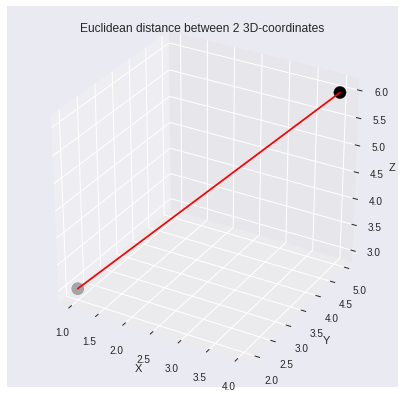

In [115]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

# visual representation of distance
coords1 = [1, 2, 3]
coords2 = [4, 5, 6]

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter((coords1[0], coords2[0]), 
        (coords1[1], coords2[1]),
        (coords1[2], coords2[2]),
         color="k", s=150)

ax.plot((coords1[0], coords2[0]), 
        (coords1[1], coords2[1]),
        (coords1[2], coords2[2]),
         color="r")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.text(x=2.5, y=3.5, z=4.0, s=' ')

plt.title('Euclidean distance between 2 3D-coordinates') 

## K-Nearest Neighbors baseline 2

In [116]:
#Load KNN predictive model library
from sklearn.neighbors import KNeighborsClassifier
#Define predictive model with default parameters of n_neighbors = 3
clf13 = KNeighborsClassifier()
#Fit training and testing datasets to model
clf13.fit(X_train, y_train)
#Test the model by comparing predictions to the test actuals
clf13_expected = y_test
clf13_predicted = clf13.predict(X_test)
#Show measures of prediction
print("accuracy: " + str(metrics.accuracy_score(clf13_expected, clf13_predicted)))
print(metrics.classification_report(clf13_expected, clf13_predicted))

accuracy: 0.6697819314641744
             precision    recall  f1-score   support

   Negative       0.77      0.28      0.41        72
    Neutral       0.65      0.97      0.78       190
   Positive       1.00      0.17      0.29        59

avg / total       0.74      0.67      0.61       321



## K-Nearest Neighbors tuned 2

In [0]:
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
myList = list(range(1,35))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

#takes some time, get a soda...
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 23


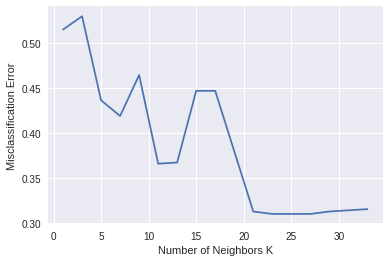

In [118]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [119]:
# what if we change the number of neighbors?

# instantiate learning model 
KNN23 = KNeighborsClassifier(n_neighbors=23)
model.fit(X_train, y_train)


# make predictions
KNN23_expected = y_test
KNN23_predicted = model.predict(X_test)

#Print the score 
print(model.score(X_test,y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(KNN23_expected, KNN23_predicted)))
print(metrics.classification_report(KNN23_expected, KNN23_predicted))

0.6635514018691588
accuracy: 0.6635514018691588
             precision    recall  f1-score   support

   Negative       0.77      0.28      0.41        72
    Neutral       0.65      0.96      0.78       190
   Positive       0.77      0.17      0.28        59

avg / total       0.70      0.66      0.60       321

